In [200]:
import random

class Player():
    
    def __init__(self, r_per_t):
        self.r_per_t = r_per_t
        self.point_total = 0
    
    def add_points(self, points):
        return self.point_total + points
    
    #def decision(self):
        
class Game():
    
    def __init__(self, player):
        self.die = [1, 2, 3, 4, 5, 6]
        self.player = player
        self.total_points = 0
    
    def roll(self):
        return random.choice(self.die)
    
    def begin(self):
        pass

    def turn(self):
        points = 0
        turn_count = 0
        while True:
            inc_points = self.roll()
            if turn_count == self.player.r_per_t:
                break
            if inc_points == 1:
                points = 0
                break
            else:
                points += inc_points
                turn_count += 1        
        return points
    
    def game_time(self):
        for t in range(7):  
            turn = self.turn()
            self.total_points += turn
    
    def boom(self):
        return self.total_points
        #return "You have {} points!".format(self.total_points)
    
class Scoreboard():
    
    def __init__(self):
        self.points = 0
        


In [393]:
import statistics as stats

def gather_data(size, rpt):
    data = []
    for _ in range(size):
        person = Player(rpt)
        game = Game(person)
        game.game_time()
        data.append(game.boom())
    return data

In [394]:


mean_list = []
stdev_list = []

for i in range(1,7):
    stdev_list.append(stats.stdev(gather_data(1000,i)))
print(mean_list)
print(stdev_list)

[]
[5.327247278244513, 10.597287081772084, 16.14408592985402, 22.06337125988119, 26.441464218723404, 30.463751429381627]


In [395]:
import math
import matplotlib.pyplot as plt
import matplotlib



In [355]:
% matplotlib inline

In [ ]:
one_rpt = gather_data(1000, 1)
two_rpt = gather_data(1000, 2)
three_rpt = gather_data(1000, 3)
four_rpt = gather_data(1000, 4)
five_rpt = gather_data(1000, 5)
six_rpt = gather_data(1000, 6)
ten_rpt = gather_data(1000, 10)
twenty_rpt = gather_data(1000, 20)
random_rpt = [stats.mean(gather_data(1000, random.choice(range(1,7)))) for _ in range(100)]

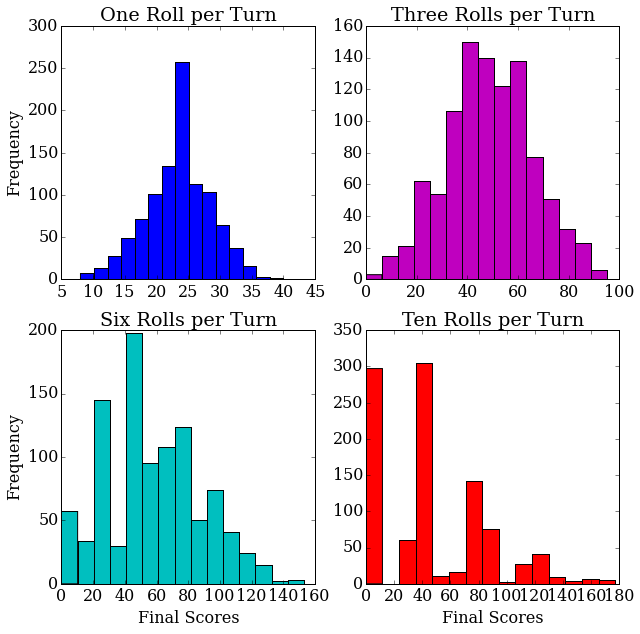

From these charts it is clear that, with the greatest score density*, 
    three rolls per turn is optimal rpt rule.
    *(wishing I was a statistician)


In [390]:
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'serif'})

figure = plt.figure(figsize = (10,10))
hist_1 = figure.add_subplot(221)
hist_2 = figure.add_subplot(222)
hist_3 = figure.add_subplot(223)
hist_4 = figure.add_subplot(224)

hist_1.hist(one_rpt, bins = 15)
hist_1.set_ylabel('Frequency')
hist_1.set_title('One Roll per Turn')

hist_2.hist(three_rpt, bins = 15, color = 'm')
hist_2.set_title('Three Rolls per Turn')

hist_3.hist(six_rpt, bins = 15, color = 'c')
hist_3.set_xlabel('Final Scores')
hist_3.set_ylabel('Frequency')
hist_3.set_title('Six Rolls per Turn')

hist_4.hist(ten_rpt, bins = 15, color = 'r')
hist_4.set_xlabel('Final Scores')
hist_4.set_title('\nTen Rolls per Turn')

plt.show()

print("""From these charts it is clear that, with the greatest score density*, 
    three rolls per turn is optimal rpt rule.
    *(wishing I was a statistician)""")

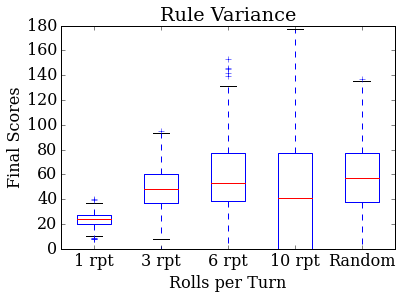

In [377]:
plt.boxplot([one_rpt, three_rpt, six_rpt, ten_rpt, random_rpt])
plt.xticks(range(1,6),['1 rpt', '3 rpt', '6 rpt', '10 rpt', 'Random'])
plt.xlabel('Rolls per Turn')
plt.ylabel('Final Scores')
plt.title('Rule Variance')
plt.show()

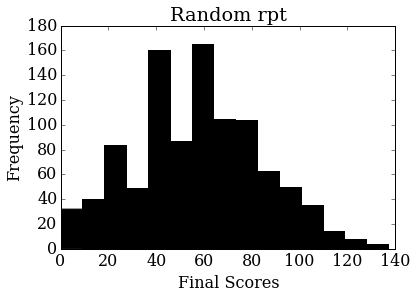

In [376]:
plt.hist(random_rpt, bins=15, color = 'k')
plt.title('Random rpt')
plt.xlabel('Final Scores')
plt.ylabel('Frequency')
plt.show()

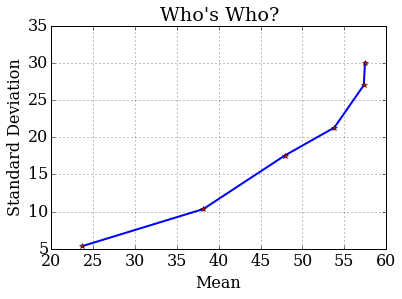

Is 2rpt more ideal than 3rpt?


In [392]:
plt.plot(mean_list, stdev_list, 'b-', linewidth = 2, marker = '*', markerfacecolor = 'r')
plt.ylabel('Standard Deviation')
plt.xlabel('Mean')
plt.title("Who's Who?")
plt.grid()
plt.show()
print('Is 2rpt more ideal than 3rpt?')